# Motivation
- With the advancements made in ML algorithms, using machine learning to predict stock prices has become a hot topic and many works have been published. 
- Yet the covid-19 pandemic unpredictably hits the world. Under this unpredicted yet hugely impactful shock, we are interested in comparing different models and evaluating whether their prediction performance is still robust to the covid shock.

In [1]:
### IMPORT LIBRARIES ###
import pandas as pd 
import numpy as np
import os as os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### SET WORKING DIRECTORY ###
Directories = {'data':'/Users/crystal-liu/Desktop/ECO481_Project'}

os.chdir(Directories['data'])
print(f'current working directory is set to {os.getcwd()}')

current working directory is set to /Users/crystal-liu/Desktop/ECO481_Project


# Data Cleaning 

In [3]:
IBM = pd.read_csv("Combine_inner_dataframe.csv") # dataframe that combined IBM stock and covid search popularity
# Drop the "Unnamed" column
IBM = IBM.drop('Unnamed: 0', axis=1)

### Convert 'date' column to pd.datetime object
IBM['date'] = pd.to_datetime(IBM['date'], format='%Y-%m-%d')

### Index by date
IBM = IBM.set_index('date')

### Calculate return in %
IBM['return %'] = IBM['Adj Close'].pct_change()*100 # % is unit of return rate
IBM = IBM.dropna(subset=['return %'])

### Add outcome/response variable: whether gains a positive daily return
IBM['positive'] = np.where(IBM['return %']>0, 1, 0) 

### Construct covid search index
# To account for the co-linearity between search popularity of covid keywords
# Take the average of each word's search index 
# LIMITATION should have more proper weight (e.g. regression coefficient between each word and death rate)

IBM["covid_search"] = IBM[['coronavirus', 'covid-19', 'lockdown', 'mask', 
                           'pandemic', 'quarantine', 'vaccine']].mean(axis=1)
IBM = IBM.drop(['coronavirus', 'covid-19', 'lockdown', 'mask', 
                  'pandemic', 'quarantine', 'vaccine'],axis=1)

### Add firm indicator
IBM["firm"] = "IBM"
IBM.head()

,Open,High,Low,Close,Adj Close,Volume,return %,positive,covid_search,firm
date,,,,,,,,,,
2019-11-04,130.248566,131.682602,130.238998,131.615677,112.116310,3488828,1.578993,1,1.298571,IBM
2019-11-05,131.739960,132.657745,131.577438,131.826004,112.295479,3153690,0.159806,1,1.302857,IBM
2019-11-06,131.931168,132.676865,131.500961,132.676865,113.020271,4683256,0.645433,1,1.281429,IBM
2019-11-07,131.806885,133.021027,131.529633,131.634796,113.457008,4261195,0.386424,1,1.347143,IBM
2019-11-08,131.529633,131.558319,130.172089,131.558319,113.391083,2383206,-0.058106,0,1.338571,IBM


In [4]:
oracle = pd.read_csv("ORCL.csv")

### Convert 'date' column to pd.datetime object
oracle = oracle.rename(columns={"Date": "date"})
oracle['date'] = pd.to_datetime(oracle['date'], format='%Y-%m-%d')

### Index by date
oracle = oracle.set_index('date')

### Calculate return in % and map to binary response
oracle["return %"] = oracle['Adj Close'].pct_change()*100
oracle = oracle.dropna(subset=['return %'])
oracle['positive'] = np.where(oracle['return %']>0, 1, 0)

### Add covid search index
oracle['covid_search'] = IBM['covid_search'].values

### Add firm indicator
oracle["firm"] = "Oracle"

oracle.head()

,Open,High,Low,Close,Adj Close,Volume,return %,positive,covid_search,firm
date,,,,,,,,,,
2019-11-04,55.259998,55.750000,55.259998,55.450001,52.749176,8757000,0.818181,1,1.298571,Oracle
2019-11-05,55.759998,55.840000,55.509998,55.669998,52.958458,10759300,0.396749,1,1.302857,Oracle
2019-11-06,55.709999,55.889999,55.599998,55.700001,52.987007,10572100,0.053908,1,1.281429,Oracle
2019-11-07,55.959999,56.630001,55.860001,55.980000,53.253353,9677700,0.502663,1,1.347143,Oracle
2019-11-08,55.980000,56.490002,55.770000,56.490002,53.738525,5869600,0.911064,1,1.338571,Oracle


In [5]:
microsoft = pd.read_csv("MSFT.csv")

### Convert 'date' column to pd.datetime object
microsoft = microsoft.rename(columns={"Date": "date"})
microsoft['date'] = pd.to_datetime(microsoft['date'], format='%Y-%m-%d')

### Index by date
microsoft = microsoft.set_index('date')

### Calculate return in % and map to binary response
microsoft["return %"] = microsoft['Adj Close'].pct_change()*100
microsoft = microsoft.dropna(subset=['return %'])
microsoft['positive'] = np.where(microsoft['return %']>0, 1, 0)

### Add covid search index
microsoft['covid_search'] = IBM['covid_search'].values

### Add firm indicator
microsoft["firm"] = "Microsoft"

microsoft.head()

,Open,High,Low,Close,Adj Close,Volume,return %,positive,covid_search,firm
date,,,,,,,,,,
2019-11-04,144.830002,145.000000,144.160004,144.550003,140.052414,16912000,0.577507,1,1.298571,Microsoft
2019-11-05,144.970001,145.020004,143.910004,144.460007,139.965225,18250200,-0.062255,0,1.302857,Microsoft
2019-11-06,144.369995,144.520004,143.199997,144.059998,139.577652,16575800,-0.276907,0,1.281429,Microsoft
2019-11-07,143.839996,144.880005,143.770004,144.259995,139.771393,17786700,0.138805,1,1.347143,Microsoft
2019-11-08,143.979996,145.990005,143.759995,145.960007,141.418564,16732700,1.178475,1,1.338571,Microsoft


In [6]:
sns.set_theme()

Text(0.5, 1.0, 'Stock Prices Nov 1, 2019 - Nov 1, 2022')

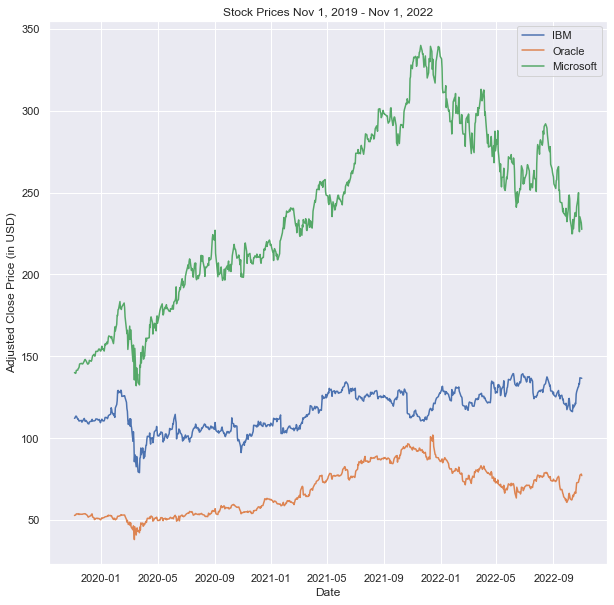

In [7]:
# Plot the stock price across time
plt.figure(figsize=(10,10))
plt.plot(IBM['Adj Close'], label="IBM")
plt.plot(oracle['Adj Close'], label="Oracle")
plt.plot(microsoft['Adj Close'], label="Microsoft")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (in USD)")
plt.legend(loc = "upper right")
plt.title("Stock Prices Nov 1, 2019 - Nov 1, 2022")

Text(0.5, 1.0, 'Stock Return versus COVID search popularity')

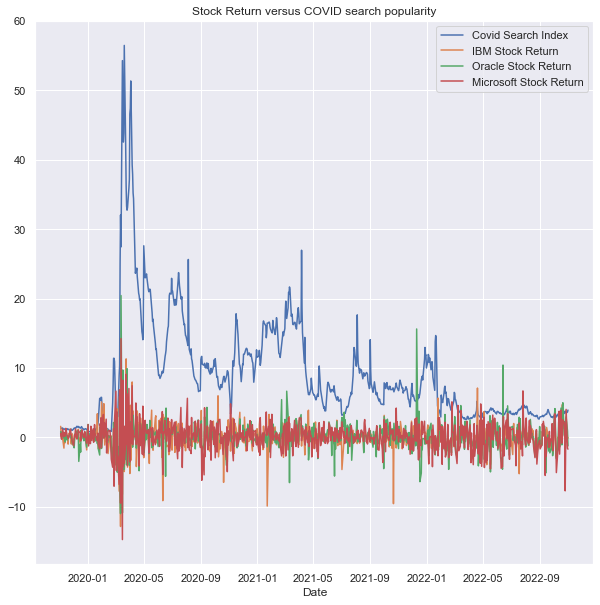

In [8]:
# Plot stock return across time
plt.figure(figsize=(10,10))
plt.plot(IBM['covid_search'], label="Covid Search Index")
plt.plot(IBM['return %'], label="IBM Stock Return")
plt.plot(oracle['return %'], label="Oracle Stock Return")
plt.plot(microsoft['return %'], label="Microsoft Stock Return")
plt.xlabel("Date")
plt.legend(loc = "upper right")
plt.title("Stock Return versus COVID search popularity")

# Methods

## Train-test split for ALL MODELS

In [9]:
# Extract Features input 
features = list(IBM.columns)
features.remove('Close')
features.remove('Adj Close')
features.remove('return %')
features.remove('positive')

print(features)

['Open', 'High', 'Low', 'Volume', 'covid_search', 'firm']


In [10]:
from sklearn.model_selection import train_test_split 
#X: data[features]
#y: data['positive']
ibm_X_train, ibm_X_test, ibm_y_train, ibm_y_test = train_test_split(IBM[features], 
                                                                    IBM['positive'],
                                                                    test_size=0.2, 
                                                                    shuffle=False)
#not to shuffle the data before splitting to preserve time indexing

In [11]:
oracle_X_train, oracle_X_test, oracle_y_train, oracle_y_test = train_test_split(oracle[features], 
                                                                    oracle['positive'],
                                                                    test_size=0.2, 
                                                                    shuffle=False)

In [12]:
ms_X_train, ms_X_test, ms_y_train, ms_y_test = train_test_split(microsoft[features], 
                                                                microsoft['positive'],
                                                                test_size=0.2, 
                                                                shuffle=False)

In [13]:
X_train = pd.concat([ibm_X_train, oracle_X_train, ms_X_train])
y_train = pd.concat([ibm_y_train, oracle_y_train, ms_y_train])

X_test = pd.concat([ibm_X_test, oracle_X_test, ms_X_test])
y_test = pd.concat([ibm_y_test, oracle_y_test, ms_y_test])

## Data Processing for models

### Encode firm labels with value between 0 and 2.

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(X_train['firm'])

X_train['firm'] = encoder.transform(X_train['firm'])
X_test['firm'] = encoder.transform(X_test['firm'])

In [15]:
list(encoder.inverse_transform(X_train['firm']))[-1]
list(encoder.inverse_transform(X_test['firm']))[-1]

'Microsoft'

### Scale all input variables, train AND test

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
pd.DataFrame(scaled_X_train, index=X_train.index).head()

,0,1,2,3,4,5
date,,,,,,
2019-11-04,-0.164425,-0.163793,-0.147089,-0.885952,-1.109672,-1.224745
2019-11-05,-0.145072,-0.151250,-0.129538,-0.908979,-1.109151,-1.224745
2019-11-06,-0.142591,-0.151004,-0.130541,-0.803881,-1.111758,-1.224745
2019-11-07,-0.144204,-0.146577,-0.130165,-0.832881,-1.103762,-1.224745
2019-11-08,-0.147801,-0.165391,-0.147966,-0.961920,-1.104805,-1.224745


## Model 1: Logit with LASSO penalty
- The first model we fit to our data is a **LASSO (L1 Penalty)** penalized logistic regression
- LASSO can help do variable selection. LASSO penalty shrinks "irrelvant" coefficients to exactly zero

### LASSO (L1-penalized) Logit model

### Cross validation to choose optimal tuning parameter of the L1 penalty term. The criteria is maximization of accuracy

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# To record the average CV accuracy for each lambda value
cv_scores_logit = {} 

#lambdas = [1, 0.1, 0.01] # C = inverse penalty strength, smaller c indiates stronger shrinkage
lambdas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for c in lambdas:
    print(c)
    logit_ = LogisticRegression(penalty='l1', 
                                C=c,
                                solver='liblinear', 
                                fit_intercept=False, 
                                random_state=481)
    #logit_.fit(X_train_scaled, y_train)
    scores = cross_val_score(logit_, 
                             scaled_X_train, 
                             y_train, 
                             scoring = 'accuracy',
                             cv = 10)
    cv_scores_logit[str(c)] = scores.mean()
    del logit_

cv_scores_logit

0.1
0.2
0.3
0.4


/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.5


/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/sit

0.6


/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/sit

0.7


/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/sit

0.8


/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/sit

0.9


/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/sit

1


/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/crystal-liu/opt/anaconda3/lib/python3.9/sit

{'0.1': 0.47406350555521826,
 '0.2': 0.47406350555521826,
 '0.3': 0.5016878149474835,
 '0.4': 0.7114140003642767,
 '0.5': 0.7362212373262097,
 '0.6': 0.7461356323234776,
 '0.7': 0.7505464149110558,
 '0.8': 0.7511019367372958,
 '0.9': 0.752200837836197,
 '1': 0.7538552607613381}

Text(0, 0.5, '10-fold CV Accuracy')

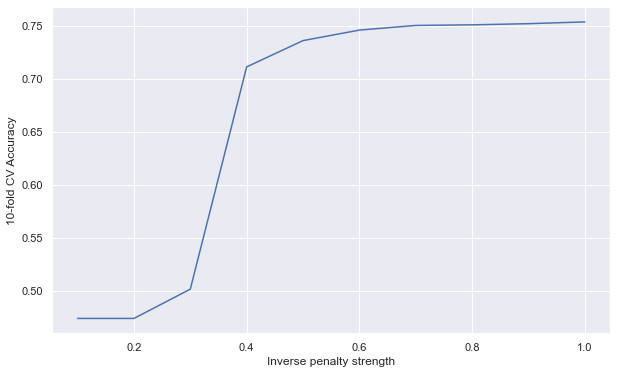

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(lambdas, cv_scores_logit.values())
plt.xlabel("Inverse penalty strength")
plt.ylabel("10-fold CV Accuracy")

## Model 1 Results: Logit model with sklearn default L1 penalty 

### Model 1 Coefficients

In [20]:
logit = LogisticRegression(penalty='l1', 
                                C=1,
                                solver='liblinear', 
                                fit_intercept=False, 
                                random_state=481)
logit_fit = logit.fit(scaled_X_train, y_train)

/Users/crystal-liu/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Model 1 Feature Importance

In [21]:
import math
coef_df = pd.DataFrame(logit_fit.coef_, columns=features)
coef_df = coef_df.transpose()
coef_df = coef_df.reset_index()
coef_df = coef_df.rename(columns={ coef_df.columns[0]:"Feature", coef_df.columns[1]: "Coefficient" })
coef_df['Importance'] = pow(math.e, coef_df['Coefficient'])
coef_df = coef_df.sort_values(by = ["Importance"], ascending=False)

coef_df

,Feature,Coefficient,Importance
2,Low,38.226063,3.993632e+16
1,High,19.422751,2.723916e+08
3,Volume,0.142216,1.152825e+00
5,firm,-0.002232,9.977706e-01
4,covid_search,-0.052278,9.490647e-01
0,Open,-57.750378,8.304809e-26


### Prediction Performance of Stock Up/Down using Model 1

In [22]:
from sklearn.metrics import accuracy_score

logit_acc = accuracy_score(y_test, logit.predict(scaled_X_test))
logit_acc

0.7770419426048565

In [23]:
# Plot the predictions: Confusion Matrix
#plt.figure(figsize=(10,10))
from sklearn.metrics import confusion_matrix
logit_cm = confusion_matrix(y_test, logit.predict(scaled_X_test))
logit_cm

array([[174,  60],
       [ 41, 178]])

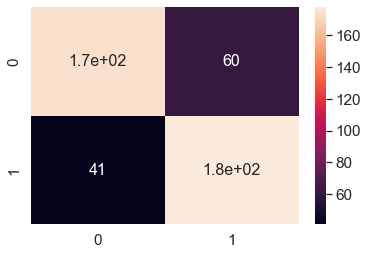

In [24]:
df_logit_cm = pd.DataFrame(logit_cm, range(2), range(2))
#plt.figure(figsize=(10,10))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_logit_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [25]:
#AUC score
from sklearn.metrics import roc_auc_score
auc_logit = roc_auc_score(y_test, logit.predict(scaled_X_test))
print('AUC: %.3f' % auc_logit)

AUC: 0.778


In [26]:
### Get model performance metrics

# MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, logit.predict(scaled_X_test)))


# R-squared
from sklearn.metrics import r2_score
print(r2_score(y_test, logit.predict(scaled_X_test)))

0.2229580573951435
0.1071888537641964


## Model 2: Decision Tree

### 10-fold Cross validation to choose optimal max_depth. The criteria is maximization of accuracy

In [28]:
from sklearn.tree import DecisionTreeClassifier

# To record the average 10-fold CV accuracy score for each max_depth
cv_scores_dt = {} 

# fitting trees of depth 1 to 30
depths = list(range(1,31))

for d in depths:
    print(d)
    # default gini criterion, best split
    dt_ = DecisionTreeClassifier(max_depth = d,
                                 random_state=481)
    #logit_.fit(X_train_scaled, y_train)
    scores = cross_val_score(dt_, 
                             scaled_X_train, 
                             y_train, 
                             scoring = 'accuracy',
                             cv = 10)
    cv_scores_dt[str(d)] = scores.mean()
    del dt_

cv_scores_dt

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


{'1': 0.4972497116143525,
 '2': 0.4922409082630077,
 '3': 0.48894724060469913,
 '4': 0.4922469795397972,
 '5': 0.49555278975168476,
 '6': 0.47016574585635357,
 '7': 0.4889168842207516,
 '8': 0.48450913727156814,
 '9': 0.4867190820229494,
 '10': 0.47398457895695467,
 '11': 0.49113897152571184,
 '12': 0.474561350251958,
 '13': 0.47953979721935525,
 '14': 0.4761884524315464,
 '15': 0.48287899945358503,
 '16': 0.4812033270596806,
 '17': 0.47235140550057675,
 '18': 0.4717867767591525,
 '19': 0.4789690972011414,
 '20': 0.47841053973650655,
 '21': 0.47398457895695467,
 '22': 0.48336773723514054,
 '23': 0.4850251957986765,
 '24': 0.4800588913848582,
 '25': 0.48281828668569,
 '26': 0.48226883613623944,
 '27': 0.4745370651448,
 '28': 0.4756390018820958,
 '29': 0.4789539190091676,
 '30': 0.47508651569425053}

Text(0, 0.5, '10-fold CV Accuracy')

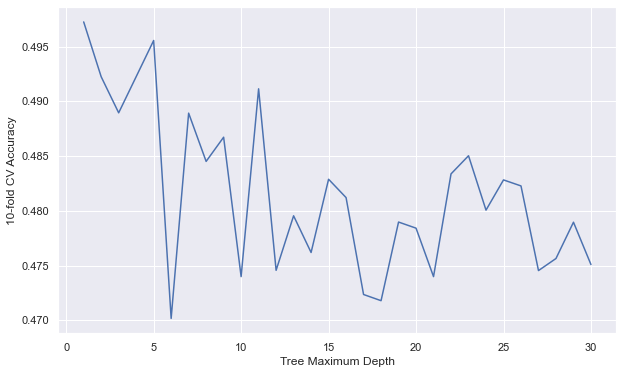

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(depths, cv_scores_dt.values())
plt.xlabel("Tree Maximum Depth")
plt.ylabel("10-fold CV Accuracy")

## Model 2: Decision Tree with max_depth=1 Results

In [29]:
dt = DecisionTreeClassifier(max_depth = 1, random_state=481)
dt_fit = dt.fit(scaled_X_train, y_train)

In [31]:
dt_acc = accuracy_score(y_test, dt_fit.predict(scaled_X_test))
dt_acc

0.48344370860927155

## Model 3: Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier 

# To record the average 10-fold CV accuracy score for each max_depth
cv_scores_rf = {} 

# fitting trees of depth 1 to 30
depths = list(range(1,31))

for d in depths:
    print(d)
    # default 100 trees, gini criterion, best split
    rf_ = RandomForestClassifier(max_depth = d,
                                 bootstrap=False, # using the entire training dataset to preserve time indexing
                                 random_state=481)
    scores = cross_val_score(rf_, 
                             scaled_X_train, 
                             y_train, 
                             scoring = 'accuracy',
                             cv = 10)
    cv_scores_rf[str(d)] = scores.mean()
    del rf_

cv_scores_rf

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


{'1': 0.5121243397486491,
 '2': 0.49224394390140247,
 '3': 0.4839900431060652,
 '4': 0.47458259972072125,
 '5': 0.4883826118632748,
 '6': 0.48065084087183535,
 '7': 0.47569364337320136,
 '8': 0.47292210551879055,
 '9': 0.4696193309452978,
 '10': 0.47898427539311517,
 '11': 0.4767712950033392,
 '12': 0.4883552911177221,
 '13': 0.4889199198591464,
 '14': 0.4894815129621759,
 '15': 0.4850494809058345,
 '16': 0.4856141096472588,
 '17': 0.4900188209580475,
 '18': 0.4983000424989375,
 '19': 0.4977293424807237,
 '20': 0.4955406471981057,
 '21': 0.4933064173395665,
 '22': 0.4867099751077652,
 '23': 0.49168235079837286,
 '24': 0.4872654969340052,
 '25': 0.49716774937769415,
 '26': 0.49221965879424434,
 '27': 0.49112682897213283,
 '28': 0.4900097140428633,
 '29': 0.4949760184566814,
 '30': 0.4894632991318074}

Text(0, 0.5, '10-fold CV Accuracy')

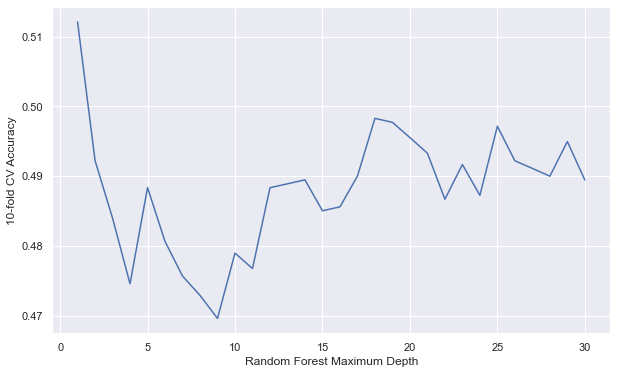

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(depths, cv_scores_rf.values())
plt.xlabel("Random Forest Maximum Depth")
plt.ylabel("10-fold CV Accuracy")

## Model 3: Random Forest with max_depth=1 Results

In [32]:
rf = RandomForestClassifier(max_depth = 1, random_state=481)
rf_fit = rf.fit(scaled_X_train, y_train)

In [34]:
from sklearn.metrics import accuracy_score
rf_acc = accuracy_score(y_test, rf_fit.predict(scaled_X_test))
rf_acc

0.48344370860927155